In [69]:
import json

f= open("data.json")
f2 = open("serie2.json")
data = json.load(f) + json.load(f2)
f.close()
f2.close()

In [70]:
import pandas as pd

df = pd.DataFrame(data)

In [71]:
[ d['email'] for d in data]
df['email'] # Serie
df[['email', 'age']] # DataFrame

import re

def transform(e):
    return re.sub('[^\d+]+','.', e)

df['new_phone'] = df['phone'].map(transform)
# df['new_phone'] = df['phone'].map(lambda x:x[2:])


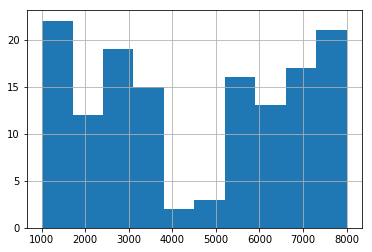

In [72]:
def convert(e):
    return float(re.sub('[\$,]+','', e))

df['balance_float'] = df['balance'].map(convert)
df['balance_float'].hist()

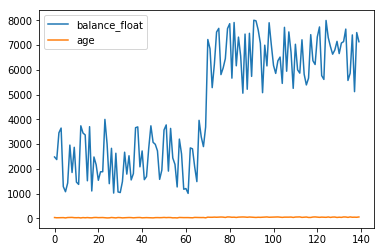

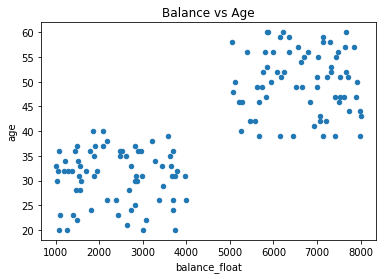

In [73]:
df[['balance_float', 'age']].plot()
df.plot.scatter('balance_float', 'age', title="Balance vs Age")


In [74]:
def ma_lambda(x):
    if x == "female":
        return "b"
    else:
        return "f"

color = df["gender"].map(lambda x:('#F57C00' if x=='female' else '#4527A0'))

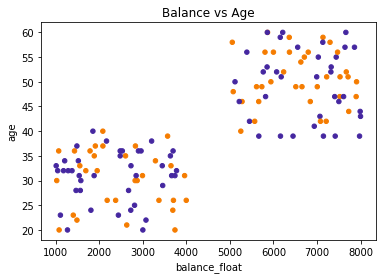

In [75]:
df.plot.scatter('balance_float', 'age', title="Balance vs Age", color=color)

In [77]:
from sklearn.mixture import GaussianMixture

In [84]:
gmm = GaussianMixture(n_components=4, covariance_type='diag')

res = gmm.fit(df[['balance_float','age']])

In [85]:
print(res.means_)
print(res.weights_)
print(res.covariances_)

[[7357.87446875   49.52045539]
 [3094.51664956   30.41273214]
 [5853.92860482   50.63468094]
 [1526.86334534   31.1785126 ]]
[0.26553856 0.27506909 0.2344571  0.22493525]
[[1.58002156e+05 3.79547133e+01]
 [2.83605731e+05 2.92280351e+01]
 [2.19900285e+05 4.16218733e+01]
 [1.24787609e+05 2.94438550e+01]]


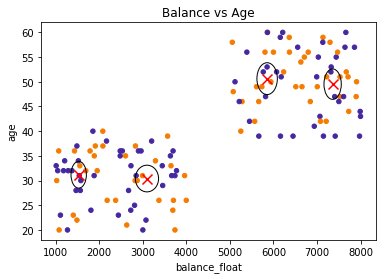

In [112]:
import numpy as np
from matplotlib.patches import Ellipse

fig = df.plot.scatter('balance_float', 'age', title="Balance vs Age", color=color)
fig.scatter(np.array(res.means_)[:,0],np.array(res.means_)[:,1], color='r', s=100, marker="x")
for pt, cov in zip(res.means_, res.covariances_):
    fig.add_artist(Ellipse(pt, np.sqrt(cov[0]), np.sqrt(cov[1]), fill=None))

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='diag')
res = gmm.fit(df[['balance_float','age']])